In [1]:
# Load packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6) 
from subprocess import check_output
print(check_output(["ls", "./hillary-clinton-emails"]).decode("utf8"))

Populating the interactive namespace from numpy and matplotlib
Aliases.csv
EmailReceivers.csv
Emails.csv
Persons.csv
hashes.txt



# Part I

In [2]:
#Lets load the hillary clinton mails
path = "./hillary-clinton-emails/"
aliases = pd.read_csv(path + 'Aliases.csv')
emReceivers = pd.read_csv(path + 'EmailReceivers.csv')
emails = pd.read_csv(path + 'Emails.csv')
persons = pd.read_csv(path + 'Persons.csv')
hashes = pd.read_table(path + 'hashes.txt')

In [3]:
aliases.sample(10)

,Id,Alias,PersonId
717,718,valmorou state. ov,419
821,822,. vermarr@state.gov,493
233,234,jjiloty lauren c,116
760,761,sullivanii@state.gov.,447
402,403,sherman wendy,213
183,184,sullivanil@state.gov,87
449,450,hanky monica r,150
434,435,mcdonough denis r. (mailto: b6,87
196,197,feltmanjd@state.gov,94
742,743,abdinh@state.gov,433


In [4]:
emReceivers.sample(10)

,Id,EmailId,PersonId
1892,1893,1439,80
5033,5034,4245,80
1144,1145,851,124
1092,1093,815,81
5493,5494,4655,80
3957,3958,3291,80
3056,3057,2475,80
3712,3713,3057,80
2327,2328,1837,80
7067,7068,6052,80


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x103ddab00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115d09400>]], dtype=object)

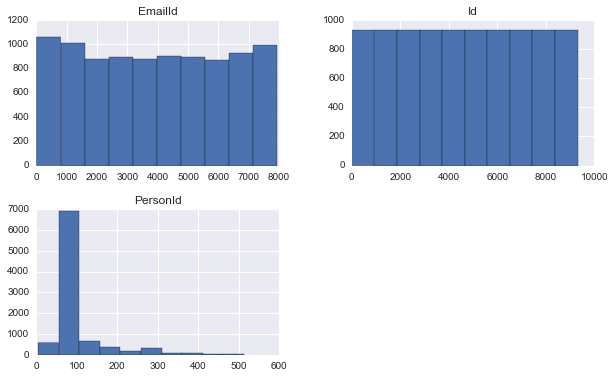

In [5]:
emReceivers.hist()

In [6]:
emails.ix[:, :10]

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841
5,6,C05739559,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739559...,F-2015-04841
6,7,C05739560,"ANTI-MUSLIM FILM DIRECTOR IN HIDING, FOLLOWING...",H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739560...,F-2015-04841
7,8,C05739561,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739561...,F-2015-04841
8,9,C05739562,SECRETARY'S REMARKS,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739562...,F-2015-04841
9,10,C05739563,MORE ON LIBYA,H,NaN,NaN,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739563...,F-2015-04841


In [7]:
emails.ix[:, 10:]

,MetadataDocumentClass,ExtractedSubject,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,HRC_Email_296,FW: Wow,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,HRC_Email_296,Re: Chris Stevens,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,HRC_Email_296,FVV: Cairo Condemnation - Final,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
5,HRC_Email_296,Meet The Right Wing Extremist Behind Anti-Musl...,NaN,NaN,NaN,"Wednesday, September 12, 2012 01:00 PM",F-2015-04841,C05739559,05/13/2015,RELEASE IN PART,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
6,HRC_Email_296,"FW: Anti-Muslim film director in hiding, follo...",NaN,"Mills, Cheryl D <MillsCD@state.gov>",NaN,"Wednesday, September 12, 2012 4:00 PM",F-2015-04841,C05739560,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
7,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739561,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.corn>\nFriday, March 11...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
8,HRC_Email_296,FVV: Secretary's remarks,NaN,"Sullivan, Jacob J <Sullivanli@stategov>",NaN,"Wednesday, September 12, 2012 6:08 PM",F-2015-04841,C05739562,05/13/2015,RELEASE IN FULL,FYI,UNCLASSIFIED\nU.S. Department of State\nCase N...
9,HRC_Email_296,more on Libya,NaN,NaN,NaN,NaN,F-2015-04841,C05739563,05/13/2015,RELEASE IN PART,"B6\nWednesday, September 12, 2012 6:16 PM\nFwd...",UNCLASSIFIED\nU.S. Department of State\nCase N...


In [8]:
# we are interested about RawText so we don't care about Nan
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7945 entries, 0 to 7944
Data columns (total 22 columns):
Id                              7945 non-null int64
DocNumber                       7945 non-null object
MetadataSubject                 7649 non-null object
MetadataTo                      7690 non-null object
MetadataFrom                    7788 non-null object
SenderPersonId                  7788 non-null float64
MetadataDateSent                7813 non-null object
MetadataDateReleased            7945 non-null object
MetadataPdfLink                 7945 non-null object
MetadataCaseNumber              7945 non-null object
MetadataDocumentClass           7945 non-null object
ExtractedSubject                6260 non-null object
ExtractedTo                     3288 non-null object
ExtractedFrom                   6692 non-null object
ExtractedCc                     2640 non-null object
ExtractedDateSent               6628 non-null object
ExtractedCaseNumber             7944 non-null

In [9]:
emails.RawText.values

array([ 'UNCLASSIFIED\nU.S. Department of State\nCase No. F-2015-04841\nDoc No. C05739545\nDate: 05/13/2015\nSTATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.\nSUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER.\nRELEASE IN FULL\nFrom: Sullivan, Jacob J <Sullivan11@state.gov>\nSent: Wednesday, September 12, 2012 10:16 AM\nTo:\nSubject: FW: Wow\nFrom: Brose, Christian (Armed Services) (mailto:Christian_Brose@armed-servic,essenate.govi\nSent: Wednesday, September 12, 2012 10:09 AM\nTo: Sullivan, Jacob J\nSubject: Wow\nWhat a wonderful, strong and moving statement by your boss. please tell her how much Sen. McCain appreciated it. Me\ntoo\nUNCLASSIFIED\nU.S. Department of State\nCase No. F-2015-04841\nDoc No. C05739545\nDate: 05/13/2015\nSTATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.\nSUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER. STATE-5CB0045247\n\x0c',
       "UNCLASSIFIED\nU.S. Department of State\nCase No. F-2015-04841\nD

In [10]:
persons.sample(5)

,Id,Name
465,466,lew jacobi
410,411,smith daniel b
316,317,reinesp@state.goy
469,470,preine5
226,227,rrh.interiors


In [11]:
totalTexts = emails.RawText.values
wholeText = ' '.join(totalTexts)

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/Sam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import re
def preprocessing(text):
    text = re.sub('[^a-zA-Z0-9 \n]', '', text.lower())
    text = re.sub(r'(  +|\n)', " ", text)
    text = re.sub(r'(^(  ?)|(  ?)$)', "", text)
    stop_words_bis = set(['@', 'http', 'www', 'fwd', 're', 'to', 'sent', 'doc', 'subject', 'fw', 'cc', 'doc', 'pm', 'pm', \
                             'release', 'part', 'in', 'full', 'b6', 'original', 'message', 'no', 'date', 'case',\
                         'unclassified', 'of', 'state'])   
    stop_words_bis.update(stopwords)
    text = ' '.join(word for word in text.split(' ')  if ( (not word in stop_words_bis))) 
    return text.lower()

In [14]:
wholeText = preprocessing(wholeText)

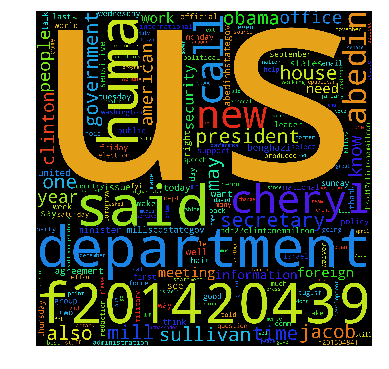

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from os import path
from PIL import Image

wc = WordCloud(width=5000, height=5000, stopwords=STOPWORDS)
wc.generate(wholeText)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [52]:
#Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
#Stemming method
porter = PorterStemmer()
def tokenizer_stemming(tweet):
    return [porter.stem(word) for word in tweet.split()]
#lemmatization methdod
lemmatizer = WordNetLemmatizer()

def lemmatize(word):
    lem = lemmatizer.lemmatize(word, pos="n")
    if (lem != word):
        return lem
    return lemmatizer.lemmatize(word, pos="v")
def tokenizer_lemma(tweet):
    return [lemmatize(word) for word in tweet.split()]

In [63]:
lemmatizer.lemmatize('tits', pos= 'n')

'tit'

In [64]:
#ex
lemmatizer.lemmatize('fucked', pos= 'v')

'fuck'

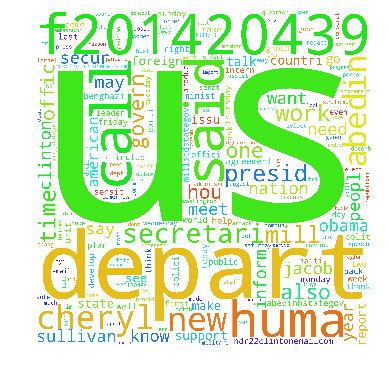

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


#troll_mask = np.array(Image.open(path.join("/Users/Sam/Desktop/3rd-Semester/Applied-Data-Analytics/Labs/Labs/05 - Taming Text", "troll.png")))

wholeText_stemmed = tokenizer_stemming(wholeText)
wc = WordCloud(background_color="white", width=5000, height=5000,stopwords=STOPWORDS)
wc.generate(' '.join(wholeText_stemmed))
plt.imshow(wc)
plt.axis("off")
plt.show()

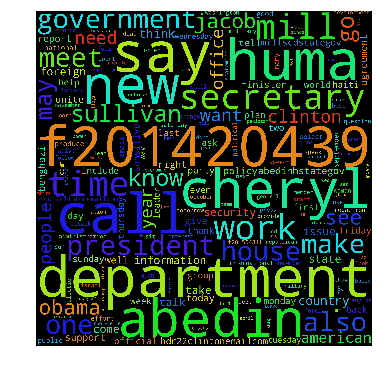

In [53]:
wholeText_lemmatized = tokenizer_lemma(wholeText)
wc = WordCloud(width=5000, height=5000, stopwords=STOPWORDS)
wc.generate(' '.join(wholeText_lemmatized))
plt.imshow(wc)
plt.axis("off")
plt.show()

# Problem 2

### Country mentions

In [149]:
import pycountry

In [193]:
countries = []
for country in pycountry.countries:
    abr=country.alpha_2
    name=country.name.split(",")[0].lower()
    #for abreviations, we count only the ones in upper case, separated by spaces in order to avoid matching
    #the part of another word
    c=' '.join(wholeText_stemmed).count(" "+abr+" ")+' '.join(wholeText_stemmed).lower().count(name)
    countries.extend([[name,c]])

In [194]:
countries.sort(key=lambda x: x[1],reverse=True)


In [195]:
df=pd.DataFrame(countries).set_index(0)

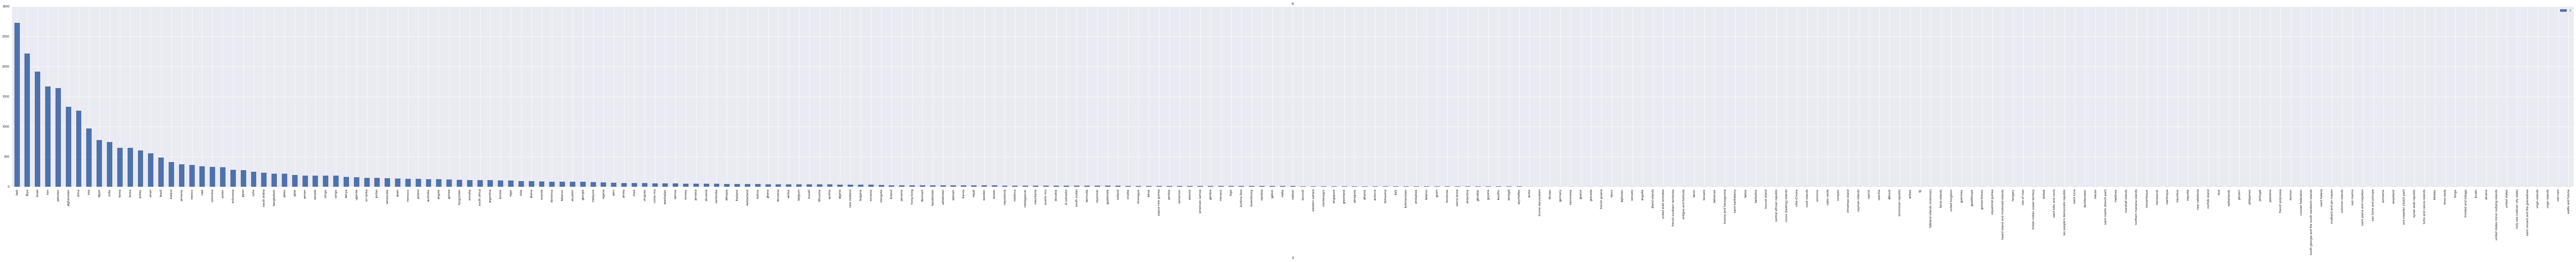

In [197]:
df.plot(kind='bar', figsize=(142, 10), title=c)

### Sentiment analysis

In [198]:
from nltk.sentiment.util import demo_liu_hu_lexicon

In [199]:
emails=emails.dropna()

Extract list of countries mentioned in each email

In [200]:
def mentioned_countries(text):
    countries = []
    for country in pycountry.countries:
        abr=country.alpha_2
        name=country.name.lower()
        c=text.count(abr)+text.lower().count(name)
        if c>0: 
            countries.extend([name])
    return countries
emails['countries']=emails['ExtractedBodyText'].map(lambda x: " ".join(mentioned_countries(x)))

For each email calculate polarity score using liu_hu_lexicon

In [201]:
def liu_hu_lexicon(sentence):
    from nltk.corpus import opinion_lexicon
    from nltk.tokenize import treebank

    tokenizer = treebank.TreebankWordTokenizer()
    pos_words = 0
    neg_words = 0
    tokenized_sent = [word.lower() for word in tokenizer.tokenize(sentence)]

    x = list(range(len(tokenized_sent))) # x axis for the plot
    y = []

    for word in tokenized_sent:
        if word in opinion_lexicon.positive():
            pos_words += 1
            y.append(1) # positive
        elif word in opinion_lexicon.negative():
            neg_words += 1
            y.append(-1) # negative
        else:
            y.append(0) # neutral
    sum_words=pos_words+neg_words
    if(pos_words+neg_words!=0):
        return (pos_words-neg_words)/sum_words
    else: return 0

In [202]:
emails['sentiment']=emails['ExtractedBodyText'].map(lambda x: liu_hu_lexicon(x))

In [203]:
def contr_scor(score_name):
    country_names = []
    scores=[]
    for country in pycountry.countries:
        name=country.name.lower()
        cont=emails.loc[emails['countries'].str.contains(name)]
        score=cont[score_name].sum()
        count=cont[score_name].count()
        country_names.extend([name])
        scores.extend([score/count])
    return country_names,scores

In [204]:
country_names,scores=contr_scor('sentiment')

/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [205]:
sent_per_country=pd.DataFrame({'country':country_names,'liu_score':scores})

In [206]:
sent_per_country=sent_per_country.set_index("country")

In [207]:
frame1=df.sort_index()

In [208]:
frame2=sent_per_country.sort_index()

Merge calculated scores with countries and their frequences

In [209]:
countries_sent=frame2.join(frame1)

In [210]:
countries_sent=countries_sent.dropna()

Function to plot frequences and polarity scores per country

In [252]:
def plot_(countries_sent, score):
    # Credits to Stack Overflow :
    # http://stackoverflow.com/questions/31313606/pyplot-matplotlib-bar-chart-with-fill-color-depending-on-value
    from matplotlib import cm

    # Set up colors : red to green
    y = np.array(countries_sent[score])
    colors = cm.RdYlGn(y / float(max(y)))
    plot = plt.scatter(y, y, c=y, cmap = 'RdYlGn')
    plt.clf()
    plt.figure(figsize=(20,10))
    clb = plt.colorbar(plot)
    clb.ax.set_title("Sentiment")

    # Display bar plot : country frequency vs. country name, with color indicating polarity score
    plt.xlim(0+0.9, 10-0.5)
    plt.bar(range(countries_sent.shape[0]), countries_sent[countries_sent.columns.values[1]], align='center', tick_label=countries_sent.index, color=colors, width=1)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Country")
    plt.ylabel("Frequency")
    plt.show()

Calculate polarity score usinf vader_analyzer and merge it with dataframe containing country names, frequences

In [212]:
from nltk.sentiment import SentimentIntensityAnalyzer
emails['vader_score']= emails['ExtractedBodyText'].map(lambda x: vader_analyzer.polarity_scores(x)['compound'])
country_names,scores=contr_scor('vader_score')
vald_sent_per_country=pd.DataFrame({'country':country_names,'vader_score':scores})
vald_sent_per_country=vald_sent_per_country.set_index('country')
fullFrame=countries_sent.join(vald_sent_per_country)


/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [228]:
fullFrame=fullFrame.loc[fullFrame[1]>0]

,liu_score,1,vader_score
haiti,0.333333,2725.0,0.477717
libya,0.333333,2216.0,0.265467
israel,0.722222,1911.0,0.528283
pakistan,0.435185,1638.0,0.652233
afghanistan,0.620690,1329.0,0.531540
china,0.479365,1260.0,0.617567
iraq,0.200000,964.0,0.855500
india,0.096774,739.0,0.127461
turkey,0.833333,603.0,0.523300
oman,0.482394,550.0,0.387678


/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


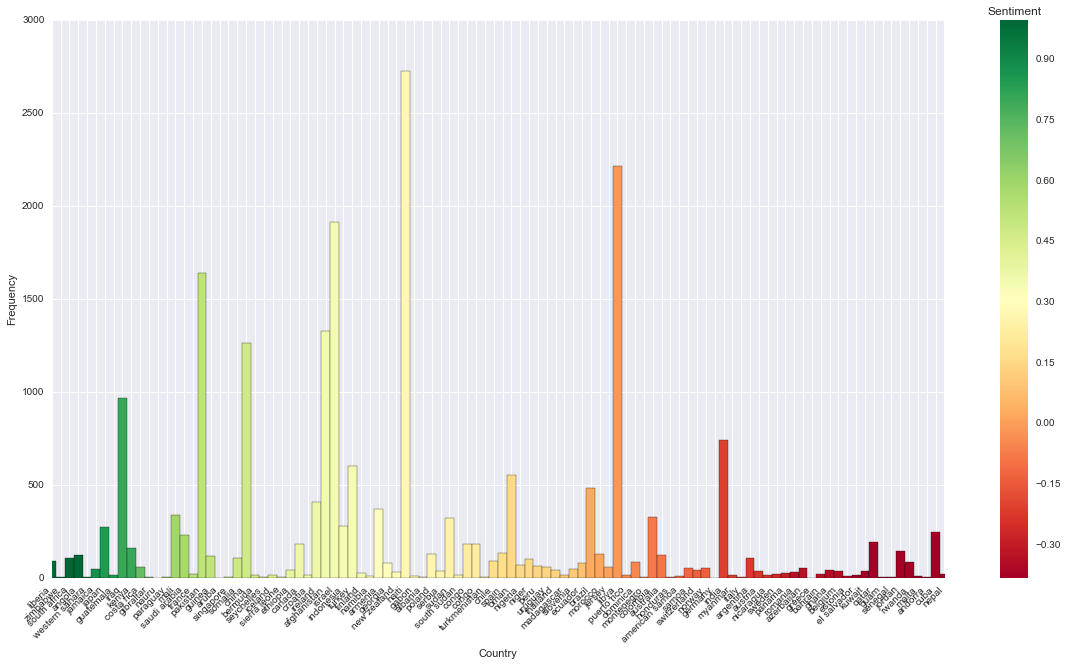

In [257]:
fullFrame=fullFrame.sort(fullFrame.columns[2],ascending=False)
plot_(fullFrame,'vader_score')

We plot the liu_polarity based on previous ordering to spot the differences

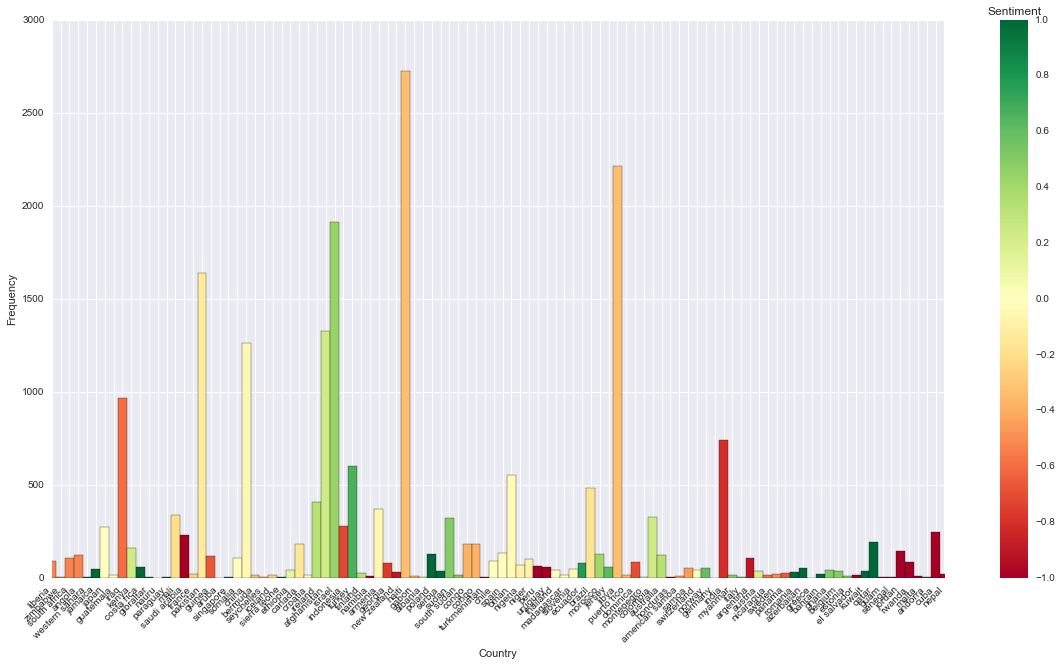

In [258]:
#fullFrame=fullFrame.sort(fullFrame.columns[0],ascending=False)
plot_(fullFrame,'liu_score')

In [ ]:
We see that the colors not ordered, meaning that liu_hu_lexicon-based and vader_analyzer-based polarity scores differ significantly

### Topic modeling

In [77]:
import gensim

In [81]:
from gensim.utils import smart_open, simple_preprocess
from gensim.corpora.wikicorpus import _extract_pages, filter_wiki
from gensim.parsing.preprocessing import STOPWORDS

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

def iter_wiki(dump_file):
    """Yield each article from the Wikipedia dump, as a `(title, tokens)` 2-tuple."""
    ignore_namespaces = 'Wikipedia Category File Portal Template MediaWiki User Help Book Draft'.split()
    for title, text, pageid in _extract_pages(smart_open(dump_file)):
        text = filter_wiki(text)
        tokens = tokenize(text)
        if len(tokens) < 50 or any(title.startswith(ns + ':') for ns in ignore_namespaces):
            continue  # ignore short articles and various meta-articles
        yield title, tokens

In [85]:
doc_stream = (tokens for tokens in totalTexts)
id2word_wiki = gensim.corpora.Dictionary(doc_stream)
clipped_corpus = gensim.utils.ClippedCorpus(wholeText, 4000)  # use fewer documents during training, LDA is slow
# ClippedCorpus new in gensim 0.10.1
# copy&paste it from https://github.com/piskvorky/gensim/blob/0.10.1/gensim/utils.py#L467 if necessary (or upgrade your gensim)
%time lda_model = gensim.models.LdaModel(clipped_corpus, num_topics=10, id2word=id2word_wiki, passes=4)

TypeError: doc2bow expects an array of unicode tokens on input, not a single string